In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [122]:
data = pd.read_csv('data.csv')

In [123]:
data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [124]:
data.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [125]:
data=data.drop(['5_o_Clock_Shadow','Bald','Bangs','Bags_Under_Eyes','Wearing_Necklace','Wearing_Hat','Wearing_Necktie','Wearing_Earrings','Receding_Hairline','Heavy_Makeup','Mustache','Goatee','Attractive',],axis=1)

In [126]:
data.columns

Index(['image_id', 'Arched_Eyebrows', 'Big_Lips', 'Big_Nose', 'Black_Hair',
       'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby',
       'Double_Chin', 'Eyeglasses', 'Gray_Hair', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Narrow_Eyes', 'No_Beard', 'Oval_Face',
       'Pale_Skin', 'Pointy_Nose', 'Rosy_Cheeks', 'Sideburns', 'Smiling',
       'Straight_Hair', 'Wavy_Hair', 'Wearing_Lipstick', 'Young'],
      dtype='object')

In [127]:
data.isnull().sum()

image_id               0
Arched_Eyebrows        0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Gray_Hair              0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Lipstick       0
Young                  0
dtype: int64

In [128]:
data.replace(-1, 0, inplace=True)

In [129]:
data

,image_id,Arched_Eyebrows,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,...,Oval_Face,Pale_Skin,Pointy_Nose,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Lipstick,Young
0,000001.jpg,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,1
1,000002.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,000003.jpg,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,000004.jpg,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
4,000005.jpg,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,001996.jpg,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1996,001997.jpg,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
1997,001998.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1998,001999.jpg,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [130]:
data['Young'].value_counts()

Young
1    1543
0     457
Name: count, dtype: int64

In [131]:
data.describe()

,Arched_Eyebrows,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,...,Oval_Face,Pale_Skin,Pointy_Nose,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Lipstick,Young
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.27000,0.245000,0.234500,0.242000,0.147500,0.054000,0.201500,0.149000,0.054000,0.041500,...,0.259000,0.040500,0.27900,0.070500,0.059500,0.480000,0.207500,0.307000,0.463500,0.771500
std,0.44407,0.430195,0.423792,0.428401,0.354692,0.226074,0.401221,0.356178,0.226074,0.199493,...,0.438195,0.197178,0.44862,0.256052,0.236617,0.499725,0.405618,0.461365,0.498791,0.419971
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             2000 non-null   object
 1   Arched_Eyebrows      2000 non-null   int64 
 2   Big_Lips             2000 non-null   int64 
 3   Big_Nose             2000 non-null   int64 
 4   Black_Hair           2000 non-null   int64 
 5   Blond_Hair           2000 non-null   int64 
 6   Blurry               2000 non-null   int64 
 7   Brown_Hair           2000 non-null   int64 
 8   Bushy_Eyebrows       2000 non-null   int64 
 9   Chubby               2000 non-null   int64 
 10  Double_Chin          2000 non-null   int64 
 11  Eyeglasses           2000 non-null   int64 
 12  Gray_Hair            2000 non-null   int64 
 13  High_Cheekbones      2000 non-null   int64 
 14  Male                 2000 non-null   int64 
 15  Mouth_Slightly_Open  2000 non-null   int64 
 16  Narrow

In [133]:
data.shape

(2000, 28)

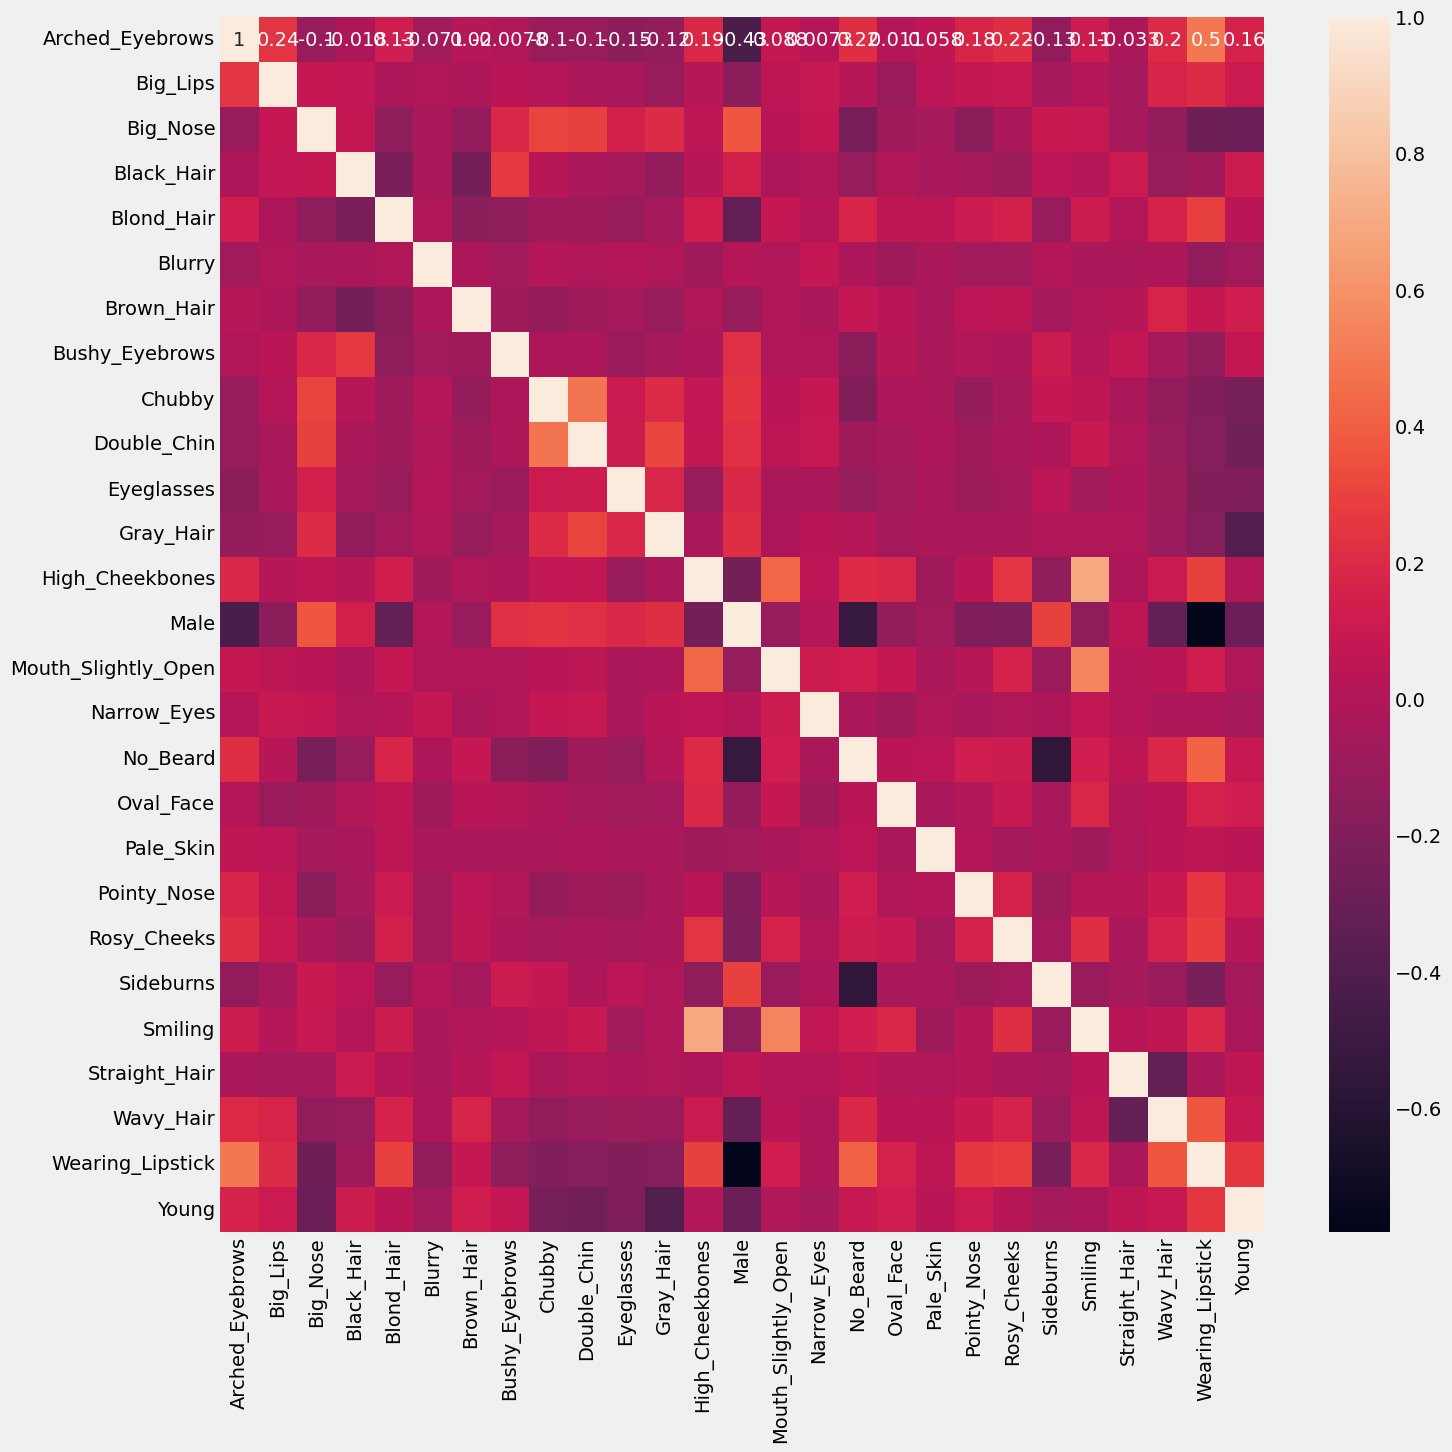

In [134]:
plt.figure(figsize=(15,15))
sn.heatmap(data.drop('image_id', axis=1).corr(), annot=True)
plt.show()

In [135]:
data

,image_id,Arched_Eyebrows,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,...,Oval_Face,Pale_Skin,Pointy_Nose,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Lipstick,Young
0,000001.jpg,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,1
1,000002.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,000003.jpg,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,000004.jpg,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
4,000005.jpg,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,001996.jpg,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1996,001997.jpg,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
1997,001998.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1998,001999.jpg,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [136]:
X = data.drop('image_id', axis=1)
y = data['image_id']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_test, y_test)

DecisionTreeClassifier()

In [139]:
y_pred = dc.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.96
Precision: 0.9416666666666665
Recall: 0.96
F1 Score: 0.9475


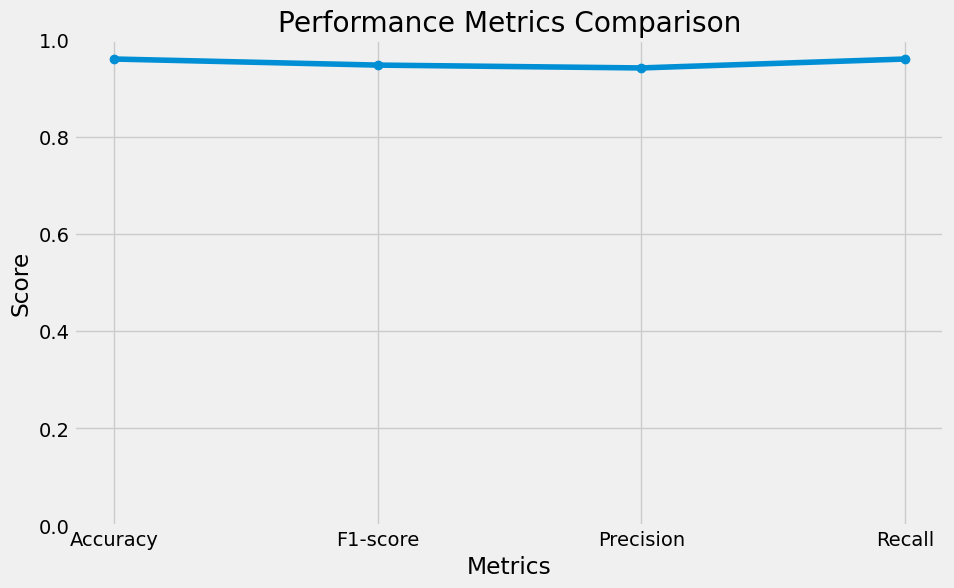

In [140]:
import matplotlib.pyplot as plt

# Assuming you have already calculated accuracy, f1, precision, and recall
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
scores = [acc, f1, precision, recall]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, scores, marker='o', linestyle='-')
plt.title('Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_test, y_test)


RandomForestClassifier()

In [142]:
y_pred = rf.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.96
Precision: 0.9416666666666665
Recall: 0.96
F1 Score: 0.9475


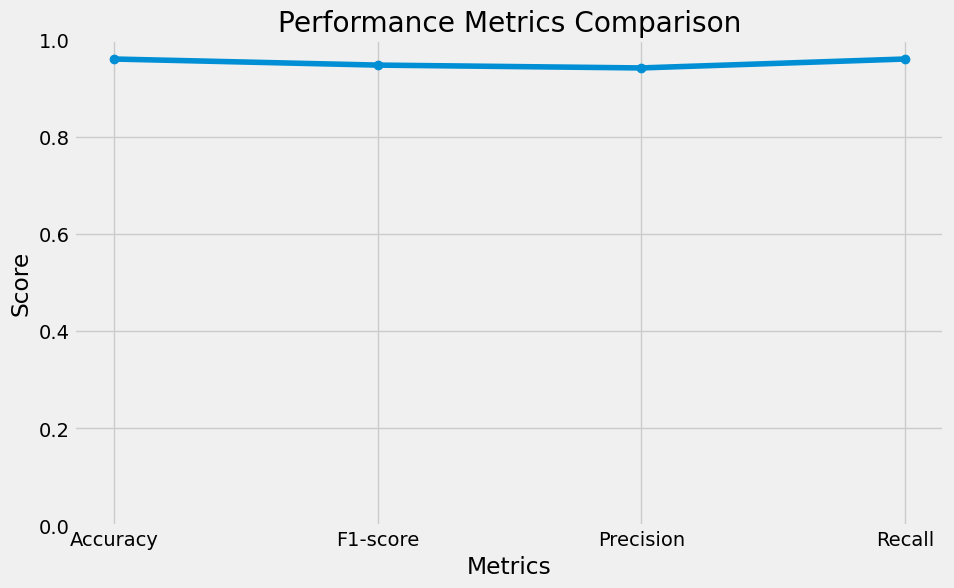

In [143]:
import matplotlib.pyplot as plt

# Assuming you have already calculated accuracy, f1, precision, and recall
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
scores = [acc, f1, precision, recall]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, scores, marker='o', linestyle='-')
plt.title('Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [144]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_test, y_test)

SVC()

In [145]:
y_pred = sv.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.96
Precision: 0.9416666666666668
Recall: 0.96
F1 Score: 0.9475


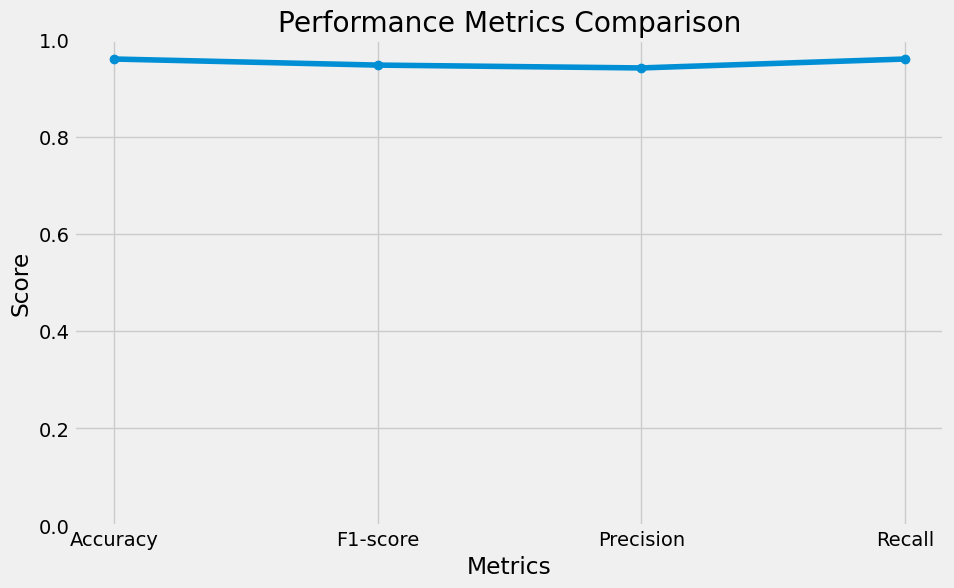

In [146]:
import matplotlib.pyplot as plt

# Assuming you have already calculated accuracy, f1, precision, and recall
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
scores = [acc, f1, precision, recall]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, scores, marker='o', linestyle='-')
plt.title('Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1
plt.grid(True)  # Add grid lines for better readability
plt.show()

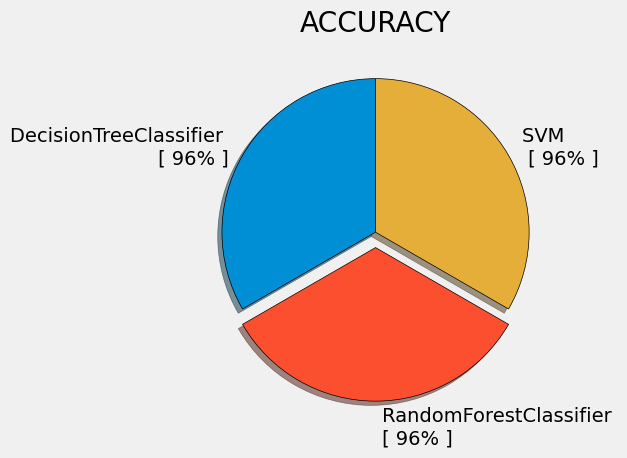

In [147]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [96, 96, 96]
labels = ['DecisionTreeClassifier \n [ 96% ]', '\n RandomForestClassifier \n [ 96% ]', 'SVM \n [ 96% ]']
explode = [0,0.1,0] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode, 
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 90,
        wedgeprops = {'edgecolor': 'black'})

#wedgeprops is to put a boundary where the two colors meet.
#more on the matplotlib wedge documentation for more customisations.

plt.title('ACCURACY')
plt.tight_layout()
plt.show()

['000423.jpg']


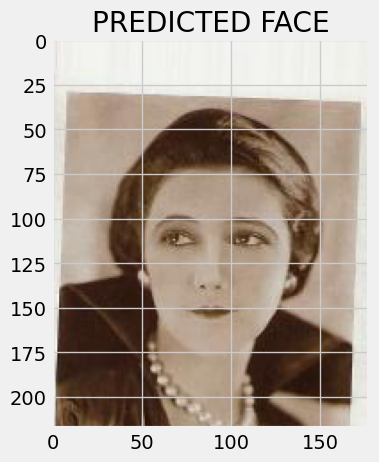

In [148]:
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
result= rf.predict(np.array([[1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1]]))
print(result)
file_paths = glob(f'images/{result[0]}')
if file_paths:
    img_path = file_paths[0] 
    img = Image.open(img_path) 
    plt.imshow(img)
    plt.title('PREDICTED FACE')
    plt.show()
else:
    print("No files found")


['001420.jpg']


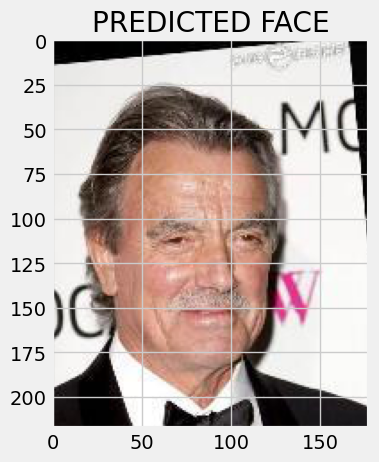

In [149]:
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
result= rf.predict(np.array([[1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1]]))
print(result)
file_paths = glob(f'images/{result[0]}')
if file_paths:
    img_path = file_paths[0] 
    img = Image.open(img_path) 
    plt.imshow(img)
    plt.title('PREDICTED FACE')
    plt.show()
else:
    print("No files found")


In [150]:
import pickle
# Dump the trained RF classifier with Pickle
RF_pkl_filename = 'RF.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rf, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()